
AVALIAÇÃO: RandomForest
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1985
           1       0.89      0.90      0.90       897
           2       0.92      0.91      0.92       540
           3       0.94      0.93      0.93       178

    accuracy                           0.94      3600
   macro avg       0.93      0.93      0.93      3600
weighted avg       0.94      0.94      0.94      3600



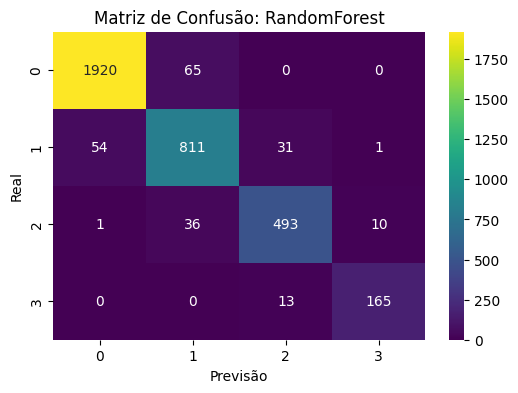


AVALIAÇÃO: XGBoost
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1985
           1       0.89      0.90      0.90       897
           2       0.93      0.91      0.92       540
           3       0.95      0.94      0.95       178

    accuracy                           0.94      3600
   macro avg       0.94      0.93      0.93      3600
weighted avg       0.94      0.94      0.94      3600



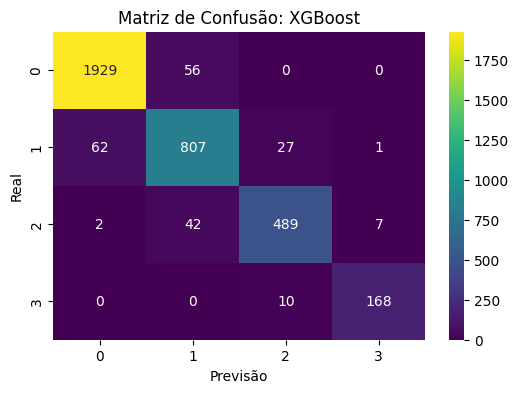


AVALIAÇÃO: LogisticRegression
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1985
           1       0.88      0.92      0.90       897
           2       0.92      0.92      0.92       540
           3       0.94      0.96      0.95       178

    accuracy                           0.94      3600
   macro avg       0.93      0.94      0.93      3600
weighted avg       0.94      0.94      0.94      3600



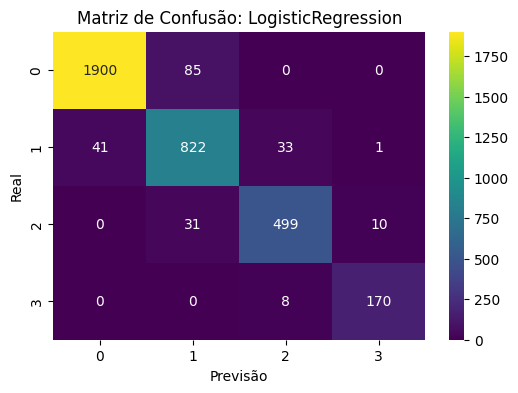


AVALIAÇÃO: SVM
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1985
           1       0.89      0.91      0.90       897
           2       0.93      0.91      0.92       540
           3       0.93      0.95      0.94       178

    accuracy                           0.94      3600
   macro avg       0.93      0.93      0.93      3600
weighted avg       0.94      0.94      0.94      3600



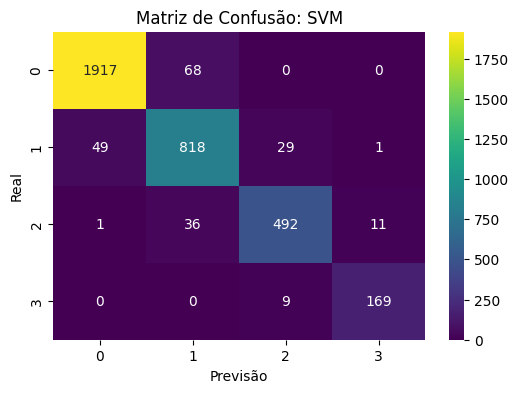

In [4]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import classification_report, confusion_matrix

def carregar_dados_teste(caminho_x_test, caminho_y_test):
    X_test = pd.read_csv(caminho_x_test)
    y_test = pd.read_csv(caminho_y_test).values.ravel()
    return X_test, y_test

def avaliar_modelos():
    X_TEST_PATH = "../data/processed/X_test.csv"
    Y_TEST_PATH = "../data/processed/y_test.csv"
    X_test, y_test = carregar_dados_teste(X_TEST_PATH, Y_TEST_PATH)
    
    lista_modelos = ["RandomForest", "XGBoost", "LogisticRegression", "SVM"]
    
    for nome in lista_modelos:
        caminho_modelo = f"../src/models/{nome}.pkl"
        if os.path.exists(caminho_modelo):
            print(f"\n" + "="*50)
            print(f"AVALIAÇÃO: {nome}")
            print("="*50)
            
            modelo = joblib.load(caminho_modelo)
            y_pred = modelo.predict(X_test)
            
            print(classification_report(y_test, y_pred))
            
            # Matriz de Confusão
            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(6, 4))
            sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
            plt.title(f'Matriz de Confusão: {nome}')
            plt.xlabel('Previsão')
            plt.ylabel('Real')
            plt.show()
        else:
            print(f"Arquivo do modelo {nome} não encontrado.")

if __name__ == "__main__":
    avaliar_modelos()